# Building a Neural Network from Scratch

Baseline: A neural network is a type of machine learning in which we have nodes that measure features of data to assign weights to nodes. The weights from the data, then are used to classify data or other functions.

    Most of the time, we can expect neural networks to be "deep" in nature, otherwise, having hidden elements.

Artifical neural networks are inspired by neurons in our brains
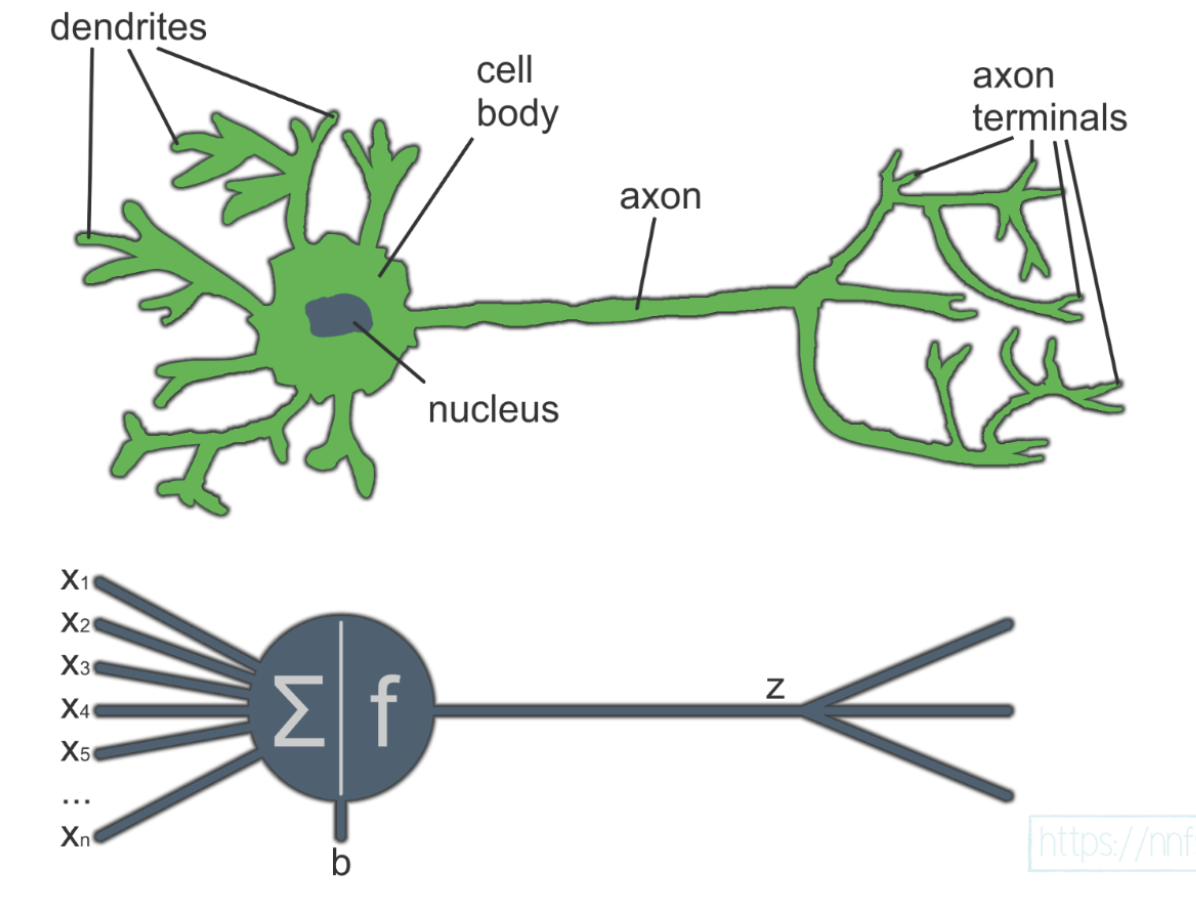

We consider neural networks to be black boxes because their benefit is derived from not knowing why they reach the results that they do.

    However, we do understand how they reach the results

### Key elements
Two key elements of neurons are the biases and weights, these are tunable parameters to optimise results aimed at fitting data. These are tuned during training and can be adjusted by hand too.
\begin{equation}
\textbf{Output} = \text{weight} \cdot \text{input} + \text{bias}
\end{equation}
By adjusting these parameters we are changing the slope of our line, which changes the magnitude of its effect!

### Use Case: Step Function
For a step funciton we take...
\begin{equation}
\text{output} = \text{sum(inputs} \cdot \text{weights)} + \text{bias}
\end{equation}
Then applying an activation function, in this case it is considered a step function...
\begin{equation}
\text{output} = \text{activation(output)}
\end{equation}

    Nowadays, more advanced versions are used instead of the basic activation function, the ReLU function is a common example

In [1]:
import numpy as np

In [2]:
# Example forward pass code
def forward_pass_example(X, w1, w2, w3, b1, b2, b3) -> int:
    loss = -np.log(
        np.sum(
            y*np.exp(
                np.dot(
                    np.maximum(
                        0,
                        np.dot(
                            np.maximum(
                                0,
                                np.dot(
                                    X,
                                    w1.T
                                ) + b1
                            ),
                            w2.T
                        ) + b2
                    ),
                    w3.T
                ) + b3
            ) / 
            np.sum(
                np.exp(
                    np.dot(
                        np.maximum(
                            0,
                            np.dot(
                                np.maximum(
                                    0,
                                    np.dot(
                                        X,
                                        w1.T
                                    ) + b1
                                ),
                                w2.T
                            ) + b2
                        ),
                        w3.T
                    ) + b3
                ),
                axis=1,
                keepdims=True
            )
        )
    )

When gathering data set aside a smaller group from the data set to use for "out-of-sample" data to validate the algorithm

In [3]:
import matplotlib as plt

# Coding the first neuron!

In [4]:
# Initialising a random set of inputs for our neuron
inputs = [1, 2, 3]

# Initialise random weights to remove redundancy from the problem
weights = [0.2, 0.8, -0.5]

# Initialise a random bias
bias = 2

In [5]:
# Calculating our output
output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias
print(output)

2.3


Next we'll look at a layer of neurons

    A layer of neurons refers to multiple neurons

### Fully Connected Neural Network

Below is a called a fully connected neural network because each neuron receives the same input but produces a different output

    Every neuron in the layer has connections to every neuron of the previous layer

In [6]:
inputs = [1.0, 2.0, 3.0, 2.5]

w_1 = [0.2, 0.8, -0.5, 1.0]
w_2 = [0.5, -0.91, 0.26, -0.5]
w_3 = [-0.26, -0.27, 0.17, 0.87]

b_1 = 2
b_2 = 3
b_3 = 0.5

In [7]:
outputs = [
    # First Neuron
    inputs[0] * w_1[0] +
    inputs[1] * w_1[1] +
    inputs[2] * w_1[2] +
    inputs[3] * w_1[3] + b_1,

    # Second Neuron
    inputs[0] * w_2[0] +
    inputs[1] * w_2[1] +
    inputs[2] * w_2[2] +
    inputs[3] * w_2[3] + b_2,

    # Third Neuron
    inputs[0] * w_3[0] +
    inputs[1] * w_3[1] +
    inputs[2] * w_3[2] +
    inputs[3] * w_3[3] + b_3
]

In [8]:
print(outputs)

[4.8, 1.21, 2.385]


As is evident this code is getting tedious so why not make it with loops

In [9]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

In [10]:
# Output of the current layer
output_layer = []

# Output for each neuron
for neuron_w, neuron_b in zip(weights, biases):
    # Initialise
    neuron_out = 0

    # Each input and weight of the neuron
    for n_input, w in zip(inputs, neuron_w):
        neuron_out += n_input * w
    # Add the bias
    neuron_out += neuron_b

    # Append result
    output_layer.append(neuron_out)

In [11]:
print(output_layer)

[4.8, 1.21, 2.385]


The methods in this are simple vector multiplications, the best method would be using tensors through functions in numpy

# Tensors, Arrays, and Vectors

Sadly, tensors are just considered as arrays in the context of deep learning :(

The dot product will be the simplest way we can perform calculations to model non-linear behaviour patterns

## Single Neuron with NumPy

This section is just because they explained what the dot product was, before

    Not necessarily important, because this is understood through manuals

In [12]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

In [13]:
output = np.dot(weights, inputs) + bias

In [14]:
print(output)

4.8


## Layer of Neurons with NumPy

In [15]:
# Same inputs, weights, and biases from before

In [16]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

In [17]:
output_layer = np.dot(weights, inputs) + biases

In [18]:
print(output_layer)

[4.8   1.21  2.385]


    Much easier!

# A Batch of Data

Generally, to train data we receive batches of samples. These samples often have features and are called feature sets.

    Samples are often referred to as observations or feature set instances

## A layer of neurons and batch of data

With our current setup the dot product of a large number of inputs and weights will be mistmatching by a tranpose of the weights

In [19]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

In [20]:
outputs = np.dot(inputs, np.array(weights).T) + biases

In [21]:
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# Adding Layers

When adding another layer its best to first meet the requirements of the latter layer

In [22]:
# First Set
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

# Second Set
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [23]:
output_layer1 = np.dot(inputs, np.array(weights).T) + biases
output_layer2 = np.dot(output_layer1, np.array(weights2).T) + biases2

In [24]:
print(output_layer2)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


#### Our neural network now looks like this!

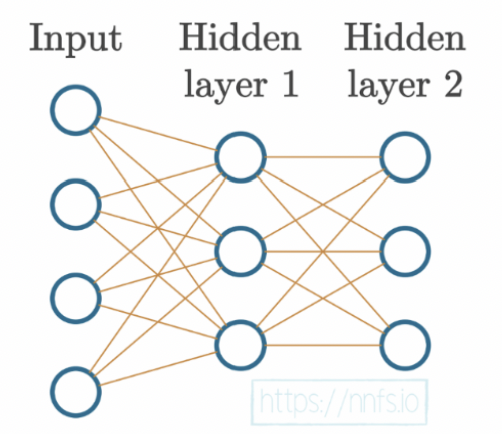

In [25]:
%pip install nnfs

  Using cached numpy-2.2.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.1-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.1 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.1 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.1 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.1 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.1 which is incompatible.
qiskit-terra 0.46.0 requires numpy<2,>=1.17, but you have numpy 2.2.1 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but y

In [26]:
# Importing a non-linear data set so that we can test our NN
from nnfs.datasets import spiral_data

import nnfs
nnfs.init()

In [27]:
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)

Here we've imported three different spirals, which you can observe by tracing the sprials out, but we will colour them shortly

In [28]:
plt.scatter(X[:,0], X[:,1])
plt.show()

TypeError: expected 0 arguments, got 1

<Figure size 640x480 with 1 Axes>

In [29]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 640x480 with 1 Axes>

## Dense Layer Class

In [30]:
# Dense Layer
class Layer_Dense:

    # Layer initialisation
    def __init__(self, n_inputs, n_neurons):
        # Initialise the weights and the biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backpropagation
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

We can set out weights and biases to something random, or we'll want to preload trained variables, or even start with a rough estimate depending on the scenario

    It's common to initialises biases and weights to 0

random.randn helps to produce a gaussian distribution of weights with a mean of 0 and variance 1, basically to create small numbers that won't hinder training

In [31]:
# Now lets use the Layer_Dense class

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense Layer class with 2 inputs features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a forward pass with our training data
dense1.forward(X)

print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


# Activation Functions

## RELU

In [32]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [33]:
# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember inputs
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backpropagation
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

In [34]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense Layer class with 2 inputs features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create the ReLU activation
activation1 = Activation_ReLU()

# Make a forward pass of our training data
dense1.forward(X)

# Forward pass through our activation func
activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


## Softmax Activation Function

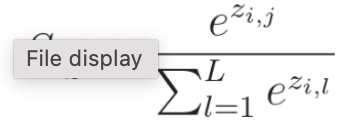

In [35]:
layer_outputs = [4.8, 1.21, 2.385]

In [36]:
import math as m

exp_vals = []
for output in layer_outputs:
    exp_vals.append(m.e ** output)

print(f'exponentiated values: {exp_vals}')

exponentiated values: [121.51041751873483, 3.353484652549023, 10.859062664920513]


In [37]:
norm_base = sum(exp_vals)
norm_vals = []
for val in exp_vals:
    norm_vals.append(val / norm_base)

print(f'Normalised expectation values: {norm_vals}')

Normalised expectation values: [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


In [38]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                         [8.9, -1.81, 0.2],
                         [1.41, 1.051, 0.026]])
print(f'Sum without axis: {np.sum(layer_outputs)}')
print(f'This will be identical to the above since default is None: {np.sum(layer_outputs, axis = None)}')

Sum without axis: 18.172
This will be identical to the above since default is None: 18.172


    Summing along axis = 0, means that we will sum row-wise along the axis 0. Therefore, the output has the same size as this axis

In [39]:
print(f'Another way to think of it w/ a matrix == axis 0: columns: {np.sum(layer_outputs, axis=0)}')

Another way to think of it w/ a matrix == axis 0: columns: [15.11   0.451  2.611]


In [40]:
# However, we want to sum vertically
print(f'So we can sum axis 1, but the current shape outputs as: {np.sum(layer_outputs, axis=1)}')

So we can sum axis 1, but the current shape outputs as: [8.395 7.29  2.487]


In [41]:
print(f'We want to sum axis 1, but kepe the same dimensions as the input: \n {np.sum(layer_outputs, axis=1, keepdims=True)}')

We want to sum axis 1, but kepe the same dimensions as the input: 
 [[8.395]
 [7.29 ]
 [2.487]]


In [42]:
# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalised probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalise them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    # Backpropagation
    def backward(self, dvalues):
        # Create an uninitialised array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate the Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Then calculate the sample-wise gradient and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

In [43]:
softmax = Activation_Softmax()

softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [44]:
softmax.forward([[-2, -1, 0]])
print(softmax.output) # Note: we should expect the same result

[[0.09003057 0.24472847 0.66524096]]


In [45]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333322 0.33333343 0.33333334]
 [0.33333296 0.33333388 0.3333332 ]
 [0.3333323  0.33333504 0.33333266]
 [0.33333194 0.33333552 0.33333248]]


# Calculating Network Error with Loss

We measure the total loss or cost function which quantifies how wrong a model is

Categorical cross-entropy loss is the most commonly used loss function with a soft-max activation output layer

In [46]:
softmax_output = [0.7, 0.1, 0.2]

If 0.7 is the desired output, then our probability distribution would be [1, 0, 0], where 1 is hot and consequently the 0's are cold.

In [47]:
import math as m

target_output = [1, 0, 0]

loss = -(m.log(softmax_output[0]) * target_output[0] +
         m.log(softmax_output[1]) * target_output[1] + 
         m.log(softmax_output[2]) * target_output[2])
print(loss)

0.35667494393873245


In [48]:
import numpy as np

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                             [0.1, 0.5, 0.4],
                             [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
            range(len(softmax_outputs)), 
            class_targets
    ]

elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs * class_targets,
        axis = 1
    )

neg_log = -np.log(correct_confidences)

average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


In [49]:
class Loss:

    def calculate(self, output, y):

        sample_losses = self.forward(output, y)

        data_loss = np.mean(sample_losses)

        return data_loss

In [50]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values - only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
        ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backpropagation
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)

        # Number of labels in every sample, we'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vectors
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalise
        self.dinputs = self.dinputs / samples

In [51]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


## Accuracy Calculation

Accuracy is what describes how often the largest confidence is the correct class in terms of a fraction. For this we look at the values that make the function maximum.

In [52]:
softmax_outputs = np.array([[0.7, 0.2, 0.1],
                            [0.5, 0.1, 0.4],
                            [0.02, 0.9, 0.08]])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])

# Calculate the values along the second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)

# If the targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)

# True evaluates to 1; False to 0
accuracy = np.mean(predictions==class_targets)

print('acc:', accuracy)

acc: 0.6666666666666666


# Introducing Optimisation

Now that we can parse data through a neural network and calculate the loss, we want to adjust the weights and biases to decrease the loss

In [53]:
from nnfs.datasets import vertical_data
nnfs.init()

In [54]:
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 640x480 with 1 Axes>

In [55]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_funciton = Loss_CategoricalCrossentropy()

In [56]:
# Defining variables to track the BEST loss and the associated weights and biases
lowest_loss = 9999999 # Initial bad value for loss
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

We will be updating the loss when a better/lower loss is found

In [57]:
for iteration in range(10000):

    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation funciton, it takes the output of the second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets, calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save the weights and biases aside
    if loss < lowest_loss:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "acc:", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()

New set of weights found, iteration: 0 loss: 1.1008677 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0994315 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.099122 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986339 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0986199 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0984716 acc: 0.36333333333333334
New set of weights found, iteration: 13 loss: 1.0984135 acc: 0.32666666666666666


Damn kinda bad...

# Gradients, Partial Derivatives, and the Chain Rule

Each weight and bias has different degrees of influence on the loss. We want to find how the function of the weight or bias impacts the overall loss.

Calculating the derivative is not so easy for neural networks, because we need to find the gradient of a massive function working in multiple dimensions

That is why we use the ANALYTICAL DERIVATIVE, which we'll implement

$$
f(x, y) = max(x, y) -> \frac{\delta}{\delta x} max(x, y) = 1(x > y)
$$

# Backpropagation

To show backpropagation we'll be starting off by backpropagating the ReLU function, but our goal is to backpropagate the loss function

In [58]:
# Example neuron
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2)

-3.0 2.0 6.0


In [59]:
z = xw0 + xw1 + xw2 + b
print(z)

6.0


In [60]:
# ReLU activation function
y = max(z, 0)
print(y)

6.0


In [61]:
# Derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


In [62]:
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(drelu_dxw0)

1.0


In [63]:
dsum_dxw1 = 1
drelu_dxw1 = drelu_dz * dsum_dxw1

dsum_dxw2 = 1
drelu_dxw2 = drelu_dz * dsum_dxw2

dsum_db = 1
drelu_db = drelu_dz * dsum_db

In [64]:
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0

print(drelu_dx0)

# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[ 0 ]
dmul_dx1 = w[ 1 ]
dmul_dx2 = w[ 2 ]
dmul_dw0 = x[ 0 ]
dmul_dw1 = x[ 1 ]
dmul_dw2 = x[ 2 ]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print (drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

-3.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


In [65]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db

In [66]:
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db
print(w, b)

[-3.001, -0.998, 1.997] 0.999


In [67]:
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

y = max(z, 0)
print(y)

5.985


# Optimisation

What we implemented before was the Stochastic Gradient Optimisation function, this is the main variation of optimisation algorithms, and most others are just variants on this.

"Stochastic" gradient descent, refers to and optimiser that fits a single sample at a time. "Batch" gradient descent is used to fit the whole dataset. Then finally the "mini-batch" gradient descenet refers to a gradient descent for sections of the dataset.

In [68]:
# Stochastic Gradient Optimiser
class Optimiser_SGD:

    # Initialise parameters - set settings, learning_rate=1. is default for this optimiser
    def __init__(self, learning_rate=1.0, decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

This code will also be present in the final version of our neural network

In [69]:
# To use this code, we go through these steps
optimiser = Optimiser_SGD()

# optimiser.update_params(dense1)
# optimiser.update_params(dense2)

Each full pass through all of the training data is called an $\textbf{epoch}$

In [70]:
# Softmax classifier - combined softmax activation and cross-entropy loss for a faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Create activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation funciton
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return the loss value
        return self.loss.calculate(self.output, y_true)

    # Backpropagation
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded, turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalise gradient
        self.dinputs = self.dinputs / samples

In [71]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense Laer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 64)

# Create ReLu activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimiser
optimiser = Optimiser_SGD()

# Start the epoch loop for training
for epoch in range(10001):
    
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation funciton it takes the output of the first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through the second Dense layer, it takes output of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through activation/loss function, it takes the output of the second dense layer here
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets, calculate values along the first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, accuaracy: {accuracy:.3f}, loss: {loss:.3f}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    optimiser.update_params(dense1)
    optimiser.update_params(dense2)

epoch: 0, accuaracy: 0.333, loss: 1.099
epoch: 100, accuaracy: 0.410, loss: 1.087
epoch: 200, accuaracy: 0.437, loss: 1.074
epoch: 300, accuaracy: 0.430, loss: 1.073
epoch: 400, accuaracy: 0.430, loss: 1.073
epoch: 500, accuaracy: 0.423, loss: 1.072
epoch: 600, accuaracy: 0.423, loss: 1.071
epoch: 700, accuaracy: 0.430, loss: 1.068
epoch: 800, accuaracy: 0.427, loss: 1.062
epoch: 900, accuaracy: 0.433, loss: 1.052
epoch: 1000, accuaracy: 0.420, loss: 1.038
epoch: 1100, accuaracy: 0.450, loss: 1.022
epoch: 1200, accuaracy: 0.417, loss: 1.003
epoch: 1300, accuaracy: 0.477, loss: 0.999
epoch: 1400, accuaracy: 0.493, loss: 0.988
epoch: 1500, accuaracy: 0.523, loss: 0.978
epoch: 1600, accuaracy: 0.537, loss: 0.967
epoch: 1700, accuaracy: 0.517, loss: 0.965
epoch: 1800, accuaracy: 0.533, loss: 0.950
epoch: 1900, accuaracy: 0.523, loss: 0.963
epoch: 2000, accuaracy: 0.533, loss: 0.934
epoch: 2100, accuaracy: 0.553, loss: 0.927
epoch: 2200, accuaracy: 0.503, loss: 0.915
epoch: 2300, accuaracy:

This is just to show what's going on in the final verison, and for some reason too, the loss is almost half what it is in the supposedly more polished copy? and the accuracy is higher too... strange

What I wanted to show was that we were getting local minima but we seem to have skipped it in this version? although our loss spikes occasionally, further proving this skipping over local minima.

If we were to get stuck in a local minima, we need to adjust the learning rate.

### Learning Rate Decay

Very simple concept of decreasing the learning rate over the training time

In [72]:
starting_learning_rate = 1.0
learning_rate_decay = 0.1

for step in range(20):
    learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))
print(learning_rate)

0.3448275862068965


We'll edit the Optimiser_SGD class

This was a fairly primitive way to solve the learning rate decriment, so we'll try some other stuff, such as momentum

### Stochastic Gradient Descent with Momentum

In [73]:
#The code will be as follows
# weight_updates = self.momentum * layer.weights_momentums - self.current_learning_rate * layer.dweights

### Adam

Adaptive Momentum is the most widely used optimiser and is built on top of RMSProp, with added momentum

# Testing Out-of-Sample Data

With neural networks, one of the biggest issues is overfitting data and losing generality. A good neural network will be able to detect future samples with ease. To test the accuracy of our neural network we need to save data for a test set.

However, bare in mind that good results in the testing set does not mean a well generalised.

In [74]:
# Create a test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

Usually run in the epoch, but we'll ignore that for the time being

In [75]:
dense1.forward(X_test)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions==y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.720, loss: 0.718


What you would usually find here is an accuracy shift of about ~10% which is evidence that our model has been overfitted; going from ~98% to ~84%.

When modelling, you can check for validation loss initially decreasing, and then slowly rising up over time which is the stage of overfitting. We want to avoid this!

The most common issues for this are: too many epochs, the learning rate is too high, or the model is too big.

        Just a side comment: when aiming to keep generalisation think of it as surrounding the problem with borders, you can keep the borders a comfortable distance apart, or you can bring them uncomfortably close and memorise the data.

# Validation Data

While we train the data, we need to tune the hyperparameters (learning rate, neuron count, layer count, etc.), however, we don't want to do this with the test data as we'll be fitting optimistically a training our data for a small number of results creating more rigid barriers and in result a weaker model. To fix this, we need to also have a validation data set.

    We also don't want to do this on our training set because that could also force overtraining

One option for this is to split the training data into a subset for training and another subset for validation or hyperparameter modifications.

Our second option is to do cross-validation. This is for scenarios where we're short on data. We basically split data into 5 chunks and iteratively choose a new validation set each time (k-fold).

    A short thought, if our biggest issue is data, we need something like simulation in order to create new data. However, this is essentially like simulating another universe, probably a future computational possibility. The idea is that if we lack lots of data to create neural networks that can produce fitting against whatever we desire, we should find a way to create the data artificially. However, there's probably some singularity making this possibility collapse.

# Training Data

We can perform a set of operations on training datasets, this is a technique referred to as preprocessing. Neural networks perform well on data between -1 and 1 this is because centering on 0 is helpful for weight biasing.

# L1 & L2 Regularisation

Regularisation methods reduce generalisation errors. L1 & L2 regularisation creates a "penalty", they calculate this in terms of the weights, a larger weight will imply a memorisation of data. This relies on the idea that a large number of neurons should contribute to the output; which makes sense.

    L1 regularisation is better for feature selection, on data with few features. L2 regularisation is better for controlling difference, when features are correlated and easier to mistake.

L1 regularisation is the sum of the absolute of the weights, L2 regularisation is the sum of the squares which punishes larger values more than smaller values.

#### If we notice an impact on accuracy between validation and training then this is probably a result of our model capacity being too small (i.e. create a bigger neural network)

# Dropout

Dropout is another option for network regularisation. It disables some neurons while the others pass through unchanged.

    This means that we can accomodate for neurons that are lacking while mainting what made the other neuron good and correcting later on.

Another issue that this helps with, aside from the obvious overfitting, is co-adoption. Co-adoption is similar to entanglement, in that the result of one neuron is reliant on the other.

    It's pretty obvious to see why drouput will help in this case

Another issue it helps with is noise, similarly with quantum computing, the more complex the problem, the more complex the function, and therefore the more a small change can affect the final result.

The main concept of dropout is disabling a set number of neurons at a given rate.

    If we're forcing a neural network to produce the same result with fewer neurons each time, then we are likely to find underlying features of the function that relate to the actual function we want to explore

#### This is super cool

What this does require is another hyperparameter...

    Oh, I should explain why this helps with overfitting to solidify my knowledge. If we are disabling neurons, we're eliminating problem cases and forcing the neural network to adapt to new changes, increasing generalised results that better match our (hopefully real) solution

We want to disable neurons using and array with the same shape as our network. We fill this array with numbers from a bernoulli distribution.

A Bernoulli distribution is a discrete probability distribution with values of 1 with probability p and 0 with probability 1 - p.

Sorry I have to include a diagram from the textbook because it's too cool:
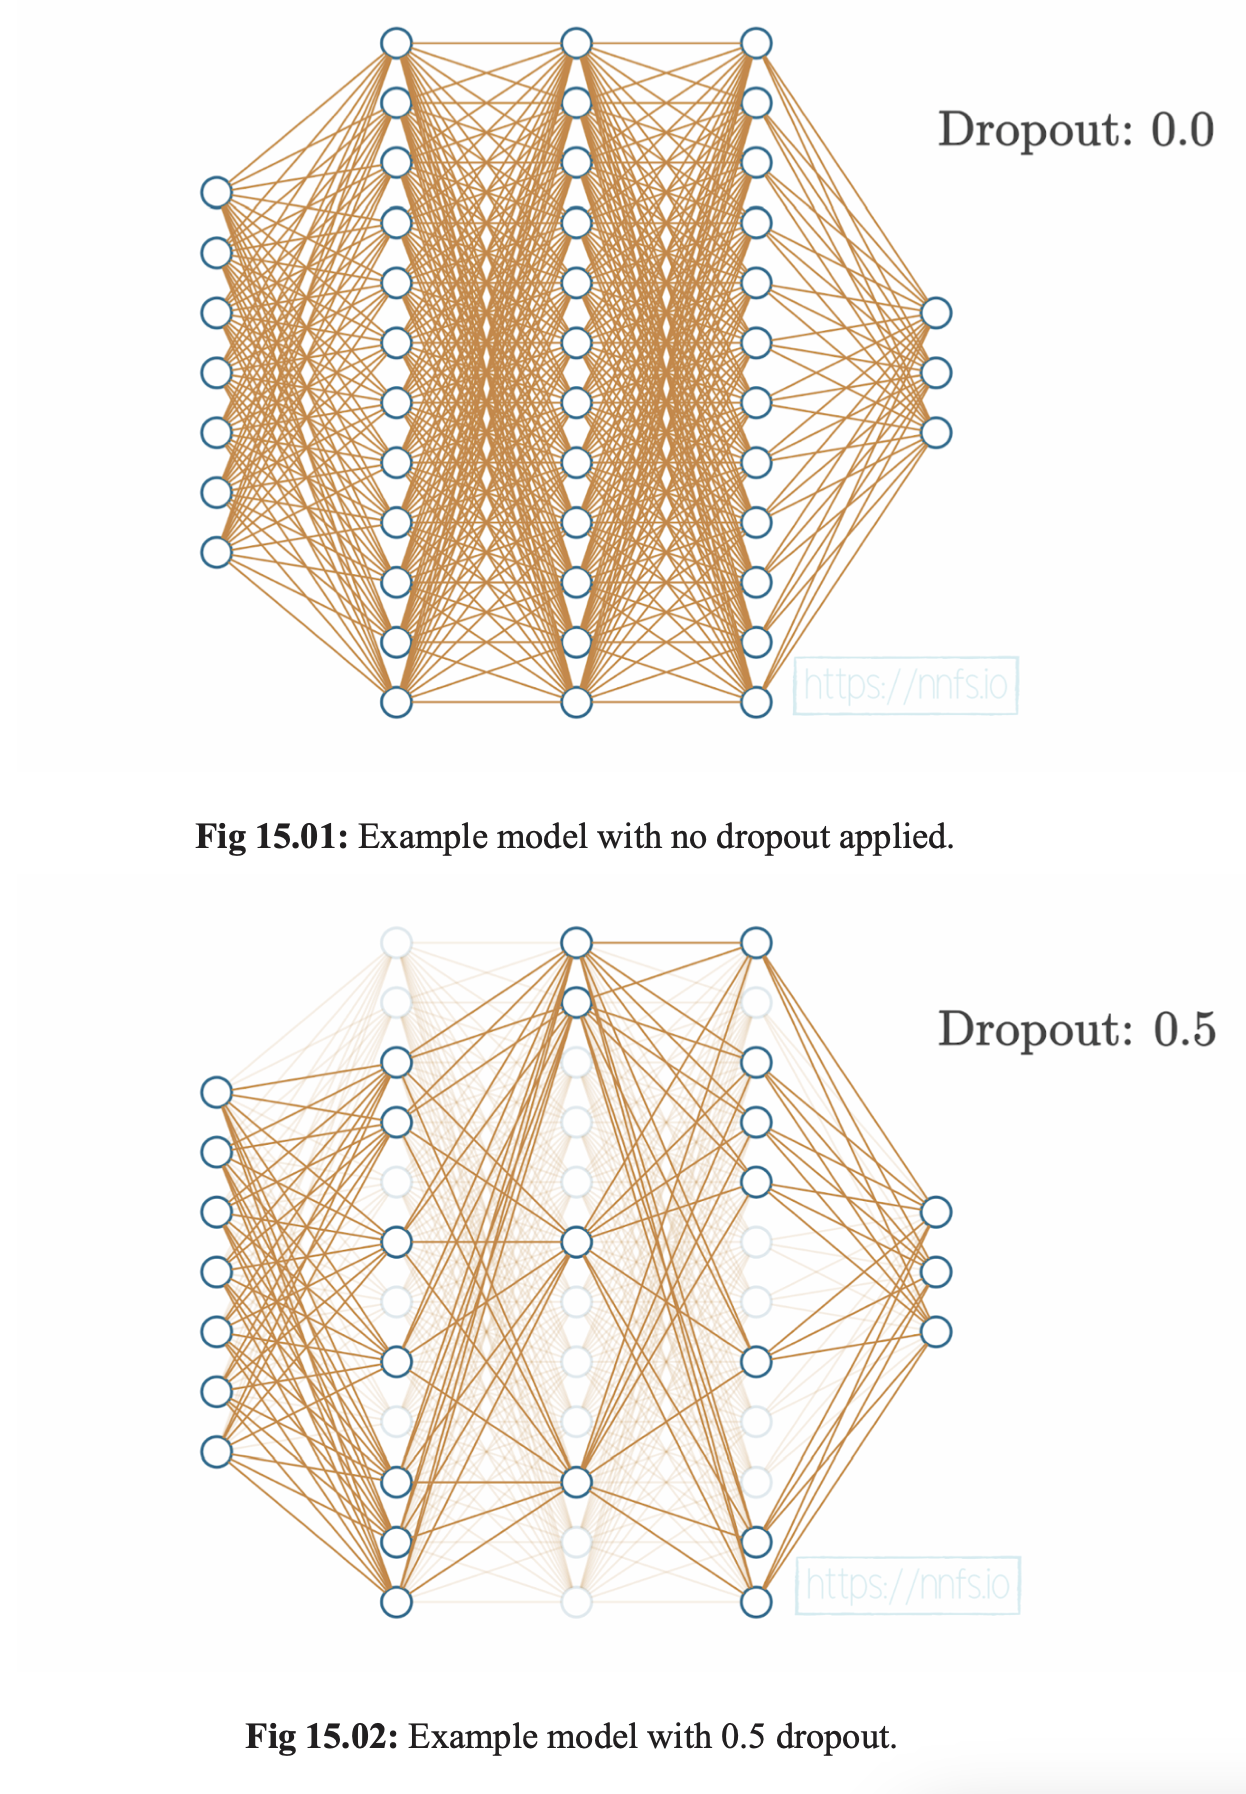

One important feature to note here is that the number of input and output neurons that are disable is always 0, because we need these to categorise the data both at the start and end for the network and for us respectively

In [76]:
import random as r

dropout_rate = 0.5
# Example output containing 10 values
example_output = [0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73]

# We want to repeat as long as it takes
while True:
    # Randomly choose an index and set it to 0
    index = r.randint(0, len(example_output) - 1)
    example_output[index] = 0

    # We might set an index that already is zeroed, to avoid this right now we'll count values that are
    dropped_out = 0
    for value in example_output:
        if value == 0:
            dropped_out += 1

    # If required number of outputs is zeroed - leave the loop
    if dropped_out / len(example_output) >= dropout_rate:
        break

print(example_output)

[0.27, 0, 0, 0.99, 0.05, 0, 0, 1.13, -0.07, 0]


We are able to simplify this if there is a binomial distribution of the Bernoulli distribution

In [77]:
# We will use, np.random.binomial(n_experiments, probability, parameter size)
np.random.binomial(2, 0.5, size=10)

array([0, 2, 1, 1, 1, 2, 0, 0, 2, 1])

We'll treat this as a layer by itself, a droupout layer

In [78]:
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73])

dropout_rate = 0.3
example_output *= np.random.binomial(1, 1-dropout_rate, example_output.shape)
print(example_output)

[ 0.   -1.03  0.    0.99  0.05 -0.37 -0.    1.13 -0.07  0.73]


When using dropout rates, make sure to know whether you're using disabling rate or keeping rate.

We only want to be using dropout during training, not prediction, so to handle our values being multiples relative to the dropout rate, we normalise the neurons.

In [79]:
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73])

example_output_ex = example_output * np.random.binomial(1, 1-dropout_rate, example_output.shape) / (1 - dropout_rate)
print(example_output_ex)

[ 0.         -1.47142857  0.          0.          0.07142857 -0.52857143
 -0.          1.61428571 -0.1         1.04285714]


In [80]:
dropout_rate = 0.2
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73])
print(f'sum initial {sum(example_output)}')

sums = []
for i in range(10000):
    example_output2 = example_output * np.random.binomial(1, 1-dropout_rate, example_output.shape) / (1 - dropout_rate)
    sums.append(sum(example_output2))
print(f'mean sum: {np.mean(sums)}')

sum initial 0.36000000000000015
mean sum: 0.3641175000000002


# Binary Logistic Regression

Up to now, we've been considering an output with values representing a confidence level of a class. The concept of binary logistic regression is having the differnece of two classes as the output.

### Sigmoid Activation Function

Sigmoid in regressors "squishes" the range of outputs from negative inf to positive inf to between 0 and 1.

    It looks very similar to some models of particles in PartPhys.

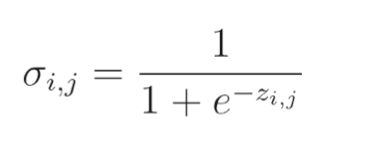

z is the given indices, i is the current sample, and j is the ouptut in that sample

The range of values approaches their new limits (0 and 1) at exponential speed; this is the core concept of why it's useful.

    Having values approach 0 or 1 at exponential speed will bias our model if values are on the left or right of the curves. This way our model essentially makes an "assumption" on what it is, very closely aligned with how we differentiate two objects.

### Binary Cross-Entropy Loss

sample_losses = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Retains the idea of negative log-likelihood for the correct and incorrect classes and adds them together. We need the sample loss which will be a mean of the losses from a single sample.

In [81]:
outputs = np.array([[1, 2, 3],
                    [2, 4, 6],
                    [0, 5, 10],
                    [11, 12, 13],
                    [5, 10, 15]])

np.mean(outputs, axis=-1)

array([ 2.,  4.,  5., 12., 10.])

# Regression

We may want to predict a more specific category, such as when the right time to buy into a stock or what the temperature will be tomorrow is. That's the core concept of our next section

In [82]:
from nnfs.datasets import sine_data

nnfs.init()

X, y = sine_data()
plt.plot(X, y)
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 640x480 with 1 Axes>

Here on a sinoid curve we want to be able to predict what the y value will be along a range of x.

### Mean Squared Error Loss

Not much to say here, but we do mean squared and mean average, very similar to the ones used in quant phys.

### Accuracy in Regression

The issues with regression is that each neuron has a separate output, and the prediction is a float value. We'll be using a precision value calculated through the standard deviation of ground truth targets and divide by 250 (random choice of ours).

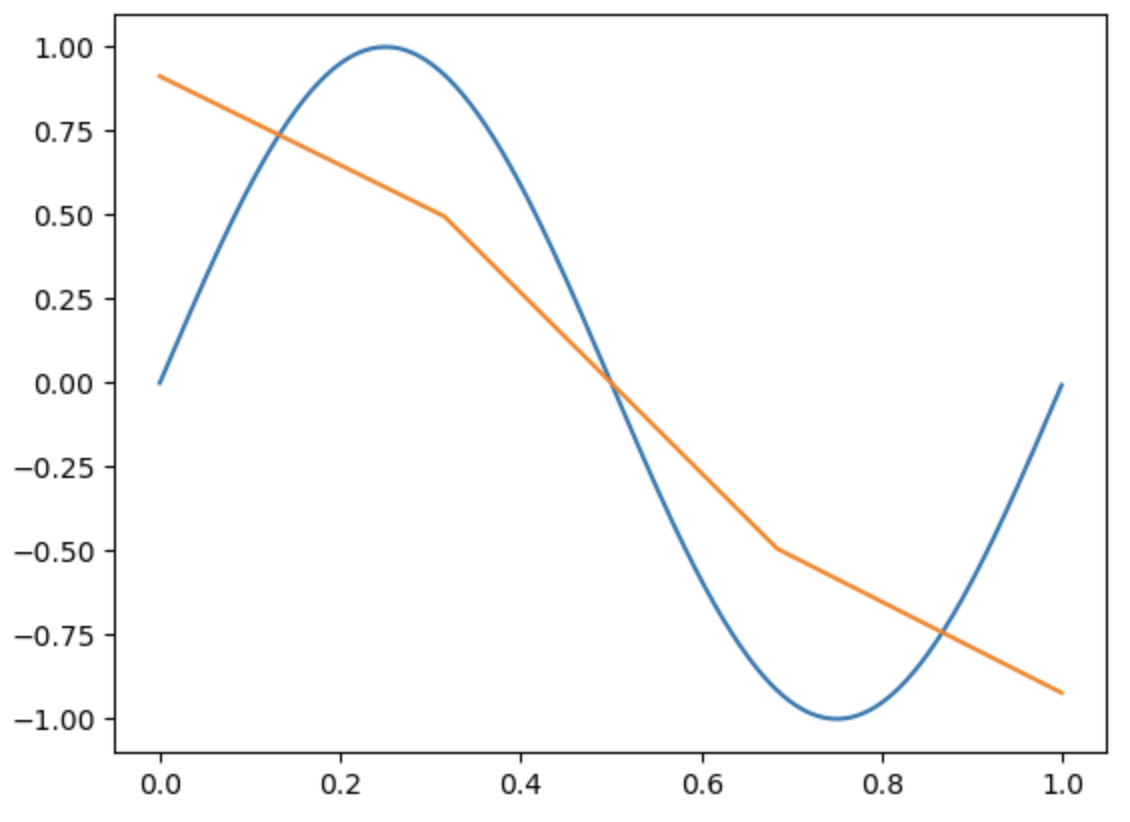
This was our result :(

Evidently we need to be thinking alinearly... or at least our programs needs to. We'll try adding an extra layer to feed through.

# Model Object

We have now created quite a large number of objects, our end goal will be eventually making the model neural network (that we have trained) it's own object.

One issue when forward passing is that the next layer doesn't know it's previous layer, so we will create a layer_input to keep track of it

# A Real Dataset

A real dataset poses it's own issues, while we have been living in the happy world of pregenerated datasets, we need to consider something more realistic. To do this we will be using Fashion MNIST, a new benchmarking for neural networks that's got more to learn than the MNIST dataset.

When considering datasets that are unevenly weighted, we want to decrease their overall impact in the neural network, which we can do with class weights.

We want to flatten out all of our images, so basically sum all of our inputs into one row.

We do this because we're working with a dense neural network and not a convolutional neural network which would allow you to pass 2D image data.

We want to now batch out our data.

# Model Evaluation

We'll be including this into our model, taking the samples and target outputs and an optional batch size.

# Saving and Loading Models and Their Parameters

There are cases in which we want to check for dead or exploding neurons, so we will create a method to iterate over the trainable layers. This will be included in the Layer_Dense class.

We also want to be able to set parameters, so we will include a method in Layer_Dense to do that.

# Prediction / Inference

We will test our model by trying random items, such as these two:

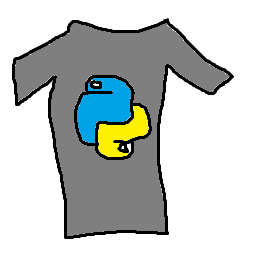
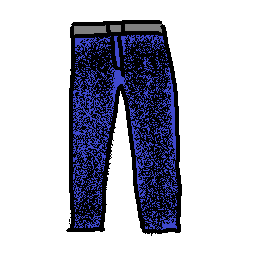